<a href="https://colab.research.google.com/github/zoetice/data-science/blob/main/Zoe_TiceU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)



In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 10.5 MB/s eta 0:00:00


In [7]:
import bambi as bmb

# **DATA Set:**

In [3]:
cruise = pd.read_csv(
    'https://raw.githubusercontent.com/zoetice/data-science/refs/heads/main/cruise%20sheet%20-%20Sheet1.csv'
    ).dropna()

In [ ]:
cruise

,Name,Line,Age,Tonnage (x1000),Passengers (x100),Length (ft) (x100),Cabins (x100),Crew (x100)
0,Journey,Azamara,6,30.277,6.49,5.94,3.55,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,0.88


# Possible Predictors:
I jotted down some possible predictors to help find the amount of people in the crew on a given ship


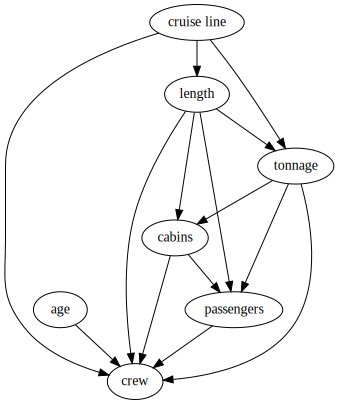

In [4]:
dag_c = gv.Digraph(comment='cruise')

dag_c.node('L', 'cruise line')
dag_c.node('A','age')
dag_c.node('T','tonnage')
dag_c.node('P','passengers')
dag_c.node('E','length')
dag_c.node('C','cabins')
dag_c.node('R','crew')

dag_c.edges(['LR','AR','LT','TP','TC','TR','PR','ET', 'EP','EC','ER','CP','CR','LE'])

dag_c

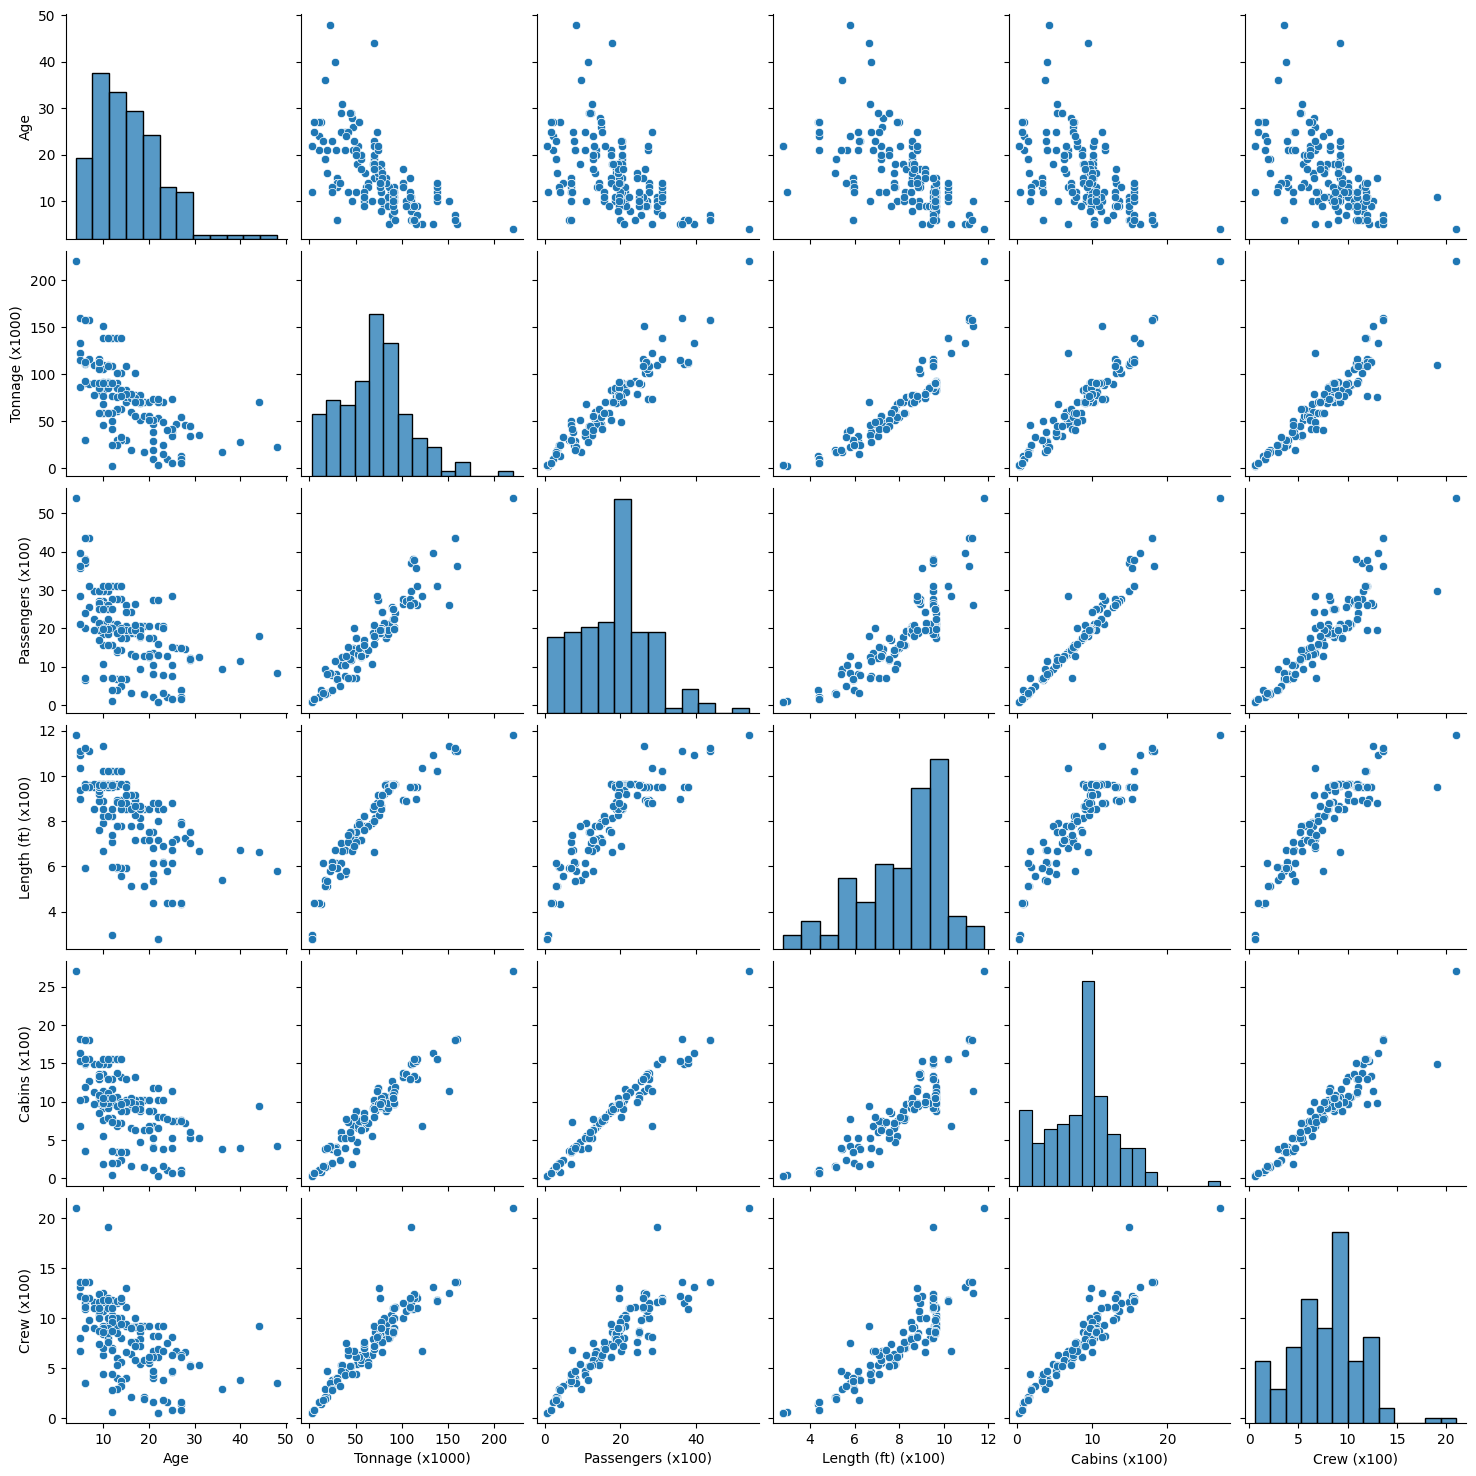

In [5]:
sns.pairplot(cruise)

# Models:
Now I will make several models, with the different predictors doing different things and see which one works the best

In [8]:
cruise_cleaned = cruise.rename(columns={
    'Tonnage (x1000)': 'Tonnage',
    'Passengers (x100)': 'Passengers',
    'Length (ft) (x100)': 'Length',
    'Cabins (x100)': 'Cabins',
    'Crew (x100)': 'Crew'
})

model_1 = bmb.Model("Crew ~ Tonnage + Passengers", cruise_cleaned)
idata_1 = model_1.fit(idata_kwargs={"log_likelihood":True})

Output()

In [9]:
model_2 = bmb.Model("Crew ~ Tonnage + (1|Passengers)", cruise_cleaned)
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True})

Output()

In [10]:
model_3 = bmb.Model("Crew ~ Tonnage * Passengers", cruise_cleaned)
idata_3 = model_3.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

Output()

In [11]:
model_4 = bmb.Model("Crew ~ Tonnage * Passengers * Cabins", cruise_cleaned)
idata_4 = model_4.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

Output()

In [12]:
model_5 = bmb.Model("Crew ~ Tonnage + Passengers + Cabins + (Tonnage * Passengers * Cabins)", cruise_cleaned)
idata_5 = model_5.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

Output()

In [13]:
model_6 = bmb.Model("Crew ~ Tonnage + Passengers + `Cabins` + `Cabins`:Passengers", cruise_cleaned)
idata_6 = model_6.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

Output()

In [14]:
model_7 = bmb.Model("Crew ~ Tonnage + Passengers + Cabins", cruise_cleaned)
idata_7 = model_7.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

Output()

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimat

                                                    rank    elpd_loo  \
Model 5: Tonnage + Passengers + Cabins + (Tonna...     0 -230.097401   
Model 4: Tonnage * Passengers * Cabins                 1 -230.949577   
Model 6: Tonnage + Passengers + `Cabins` + `Cab...     2 -231.146313   
Model 7: Tonnage + Passengers + Cabins                 3 -233.480166   
Model 2: Tonnage + (1|Passengers)                      4 -254.001381   
Model 3: Tonnage * Passengers                          5 -263.625942   
Model 1: Tonnage + Passengers                          6 -265.821689   

                                                        p_loo  elpd_diff  \
Model 5: Tonnage + Passengers + Cabins + (Tonna...  16.038872   0.000000   
Model 4: Tonnage * Passengers * Cabins              16.572597   0.852176   
Model 6: Tonnage + Passengers + `Cabins` + `Cab...  13.980061   1.048911   
Model 7: Tonnage + Passengers + Cabins              11.887307   3.382765   
Model 2: Tonnage + (1|Passengers)          

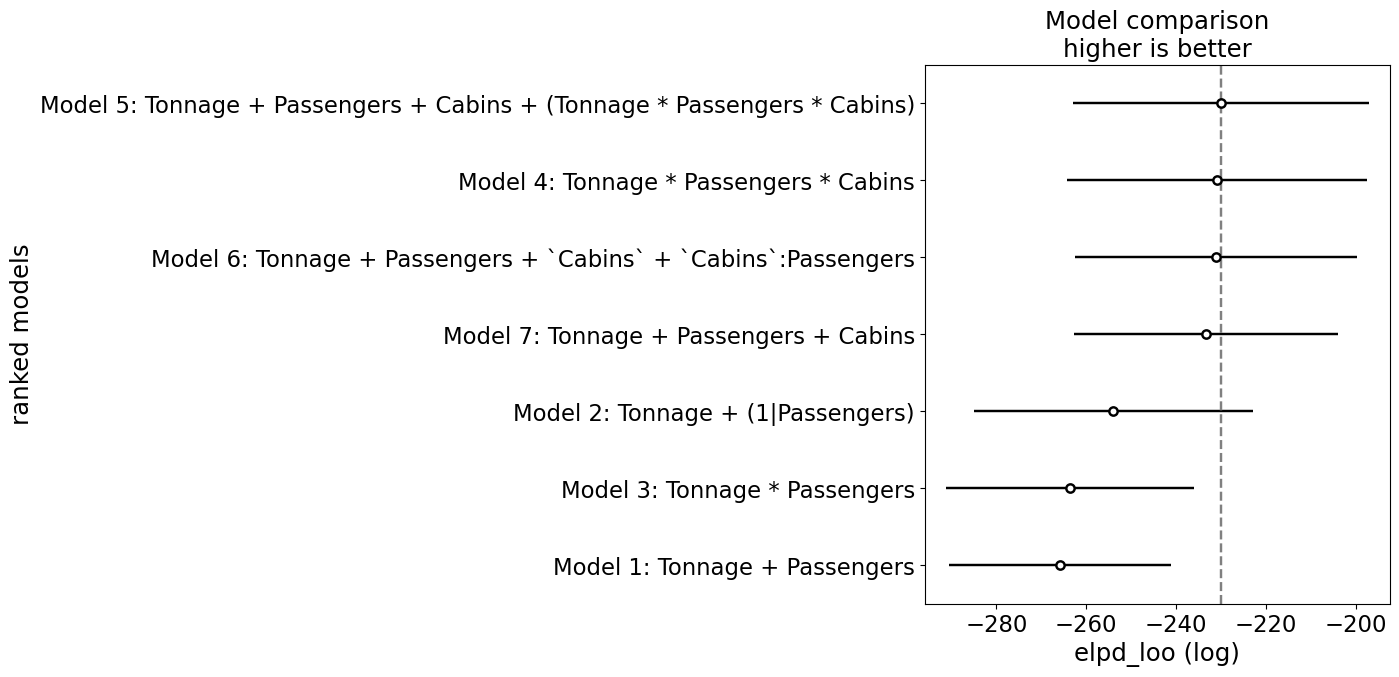

In [15]:
models_dict = {
    "Model 1: Tonnage + Passengers": idata_1,
    "Model 2: Tonnage + (1|Passengers)": idata_2,
    "Model 3: Tonnage * Passengers": idata_3,
    "Model 4: Tonnage * Passengers * Cabins": idata_4,
    "Model 5: Tonnage + Passengers + Cabins + (Tonnage * Passengers * Cabins)": idata_5,
    "Model 6: Tonnage + Passengers + `Cabins` + `Cabins`:Passengers": idata_6,
    "Model 7: Tonnage + Passengers + Cabins": idata_7
}

comp_df = az.compare(models_dict)
print(comp_df)

az.plot_compare(comp_df, insample_dev=False)
plt.show()

"Tonnage * Passengers * Cabins", "Tonnage + Passengers + Cabins + Cabins:Passengers", "Tonnage + Passengers + Cabins + (Tonnage * Passengers * Cabins)", and "Tonnage + Passengers + Cabins" all look good. I've chosen to use "Tonnage + Passengers + Cabins" as is includes all three predictors but keeps things simple with no interactions.

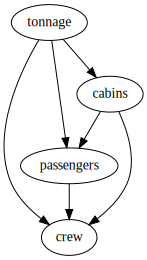

In [ ]:
dag_c2 = gv.Digraph(comment='cruise')

dag_c2.node('T','tonnage')
dag_c2.node('P','passengers')
dag_c2.node('R','crew')
dag_c2.node('C','cabins')

dag_c2.edges(['TR','TP','PR','CR','CP','TC'])

dag_c2

# Visualizing the model(s)

In [16]:
model_cruise2_bmb = bmb.Model("Crew ~ Tonnage + Passengers + `Cabins` + `Cabins`:Passengers", cruise_cleaned, family="negativebinomial")
idata_cruise2_bmb = model_cruise2_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='Tonnage', ylabel='Crew'>], dtype=object))

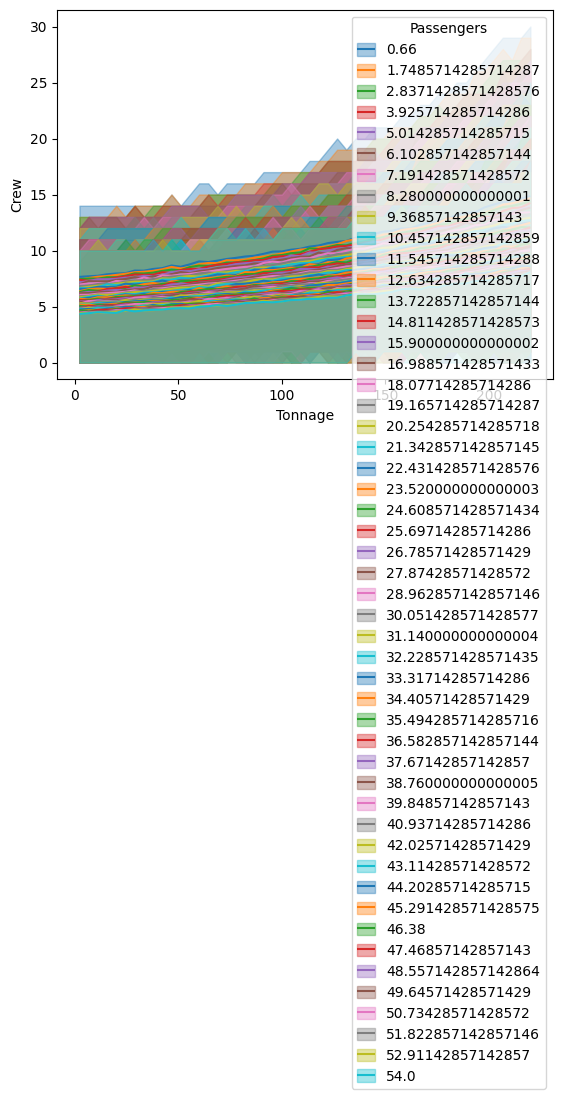

In [17]:
bmb.interpret.plot_predictions(model_cruise2_bmb, idata_cruise2_bmb, ["Tonnage", "Passengers"],
                               #subplot_kwargs={"group":None, "panel":"Passengers"},
                               legend=True,
                               fig_kwargs={"sharey":True, "sharex":True}, pps=True)

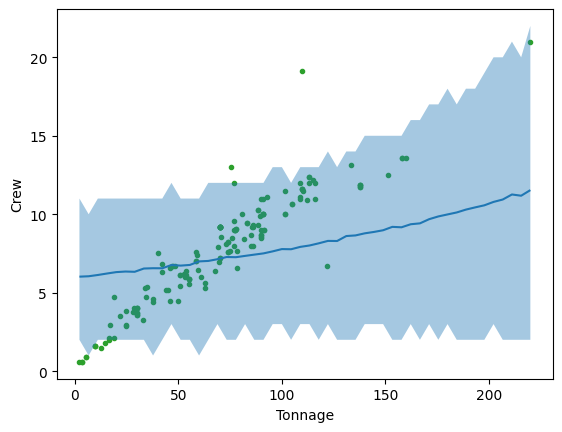

In [18]:
bmb.interpret.plot_predictions(model_cruise2_bmb, idata_cruise2_bmb, "Tonnage", pps = True)
plt.plot(cruise_cleaned.Tonnage, cruise_cleaned.Crew, "C2.", zorder=-3)

In [19]:
model_cruise_bmb = bmb.Model("Crew ~ Tonnage + Passengers + Cabins", cruise_cleaned, family="negativebinomial")
idata_cruise_bmb = model_cruise_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='Tonnage', ylabel='Crew'>], dtype=object))

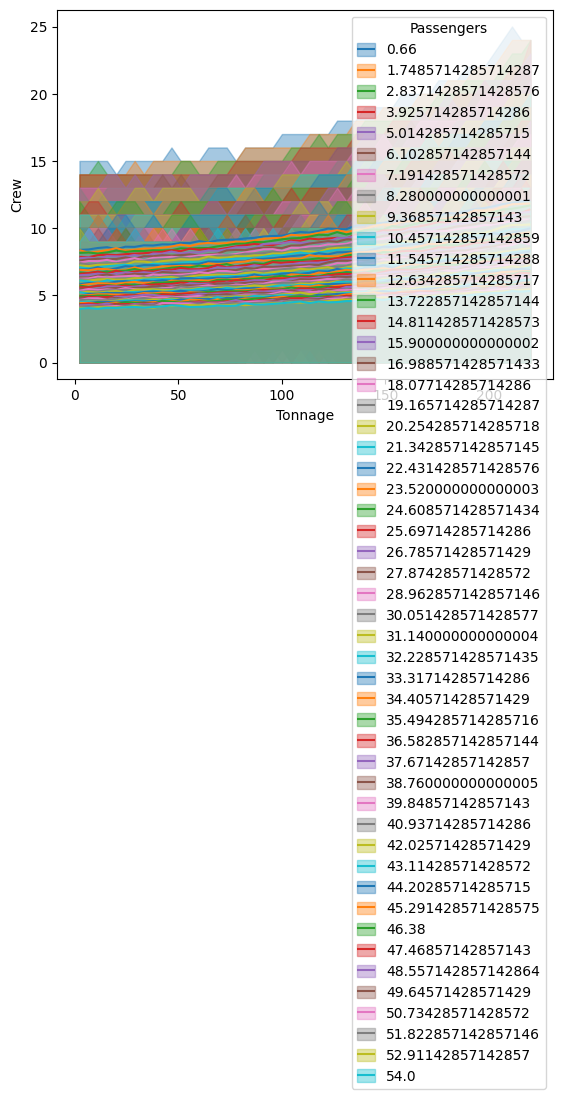

In [20]:
bmb.interpret.plot_predictions(model_cruise_bmb, idata_cruise_bmb, ["Tonnage", "Passengers"],
                               #subplot_kwargs={"group":None, "panel":"Passengers"},
                               legend=True,
                               fig_kwargs={"sharey":True, "sharex":True}, pps=True)

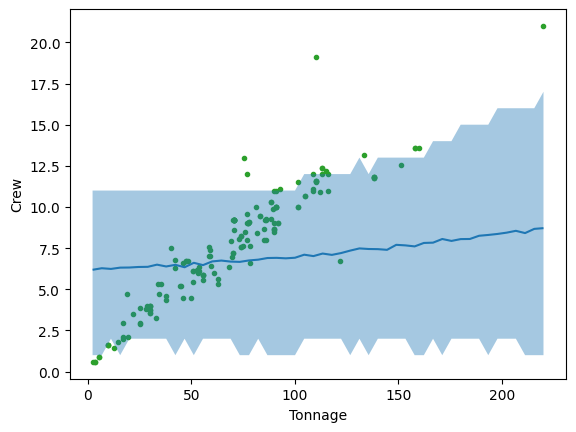

In [22]:
bmb.interpret.plot_predictions(model_cruise_bmb, idata_cruise_bmb, "Tonnage", pps = True)
plt.plot(cruise_cleaned.Tonnage,cruise_cleaned.Crew, "C2.", zorder=-3)

# Analysis:
**What did not make sense:** The Rainbow graph showed that as the Tonnage went up, so did the Crew numbers, but as the Passengers went up with the Tonnage, the crew went down, which didn't make much sense to me, and goes against the pairplot.

**What did make sense:** using more predictors (3 in this case) gave a more accurate reading and prediction, and using a simpler model worked just as well if not better in this case.

**What does this mean in real life?** Cruises will have bigger crews if the boat itself is bigger, and if there are more people to serve on the cruise. *Makes sense...*